# Data Input

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time

In [0]:
#for google colab only:
from google.colab import files
uploaded = files.upload() 
import io
df = pd.read_csv(io.BytesIO(uploaded['wdbc.data']), sep=',',
                 header=None, na_values="?")
df.info()

Saving wdbc.data to wdbc (2).data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
0     569 non-null int64
1     569 non-null object
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64


No null values detected with ? as identifier, lets look at the values

**Data Header: **
1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)
  a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

In [0]:
header_list = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension"]
df.columns = ["ID number", "Diagnosis"] + [x + "_mean" for x in header_list] + [x + "_SE" for x in header_list] + [x + "_worst" for x in header_list]
df.head()

,ID number,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


__Histogram__

In [0]:
def attribute_hist(df, attribute):
  m = plt.hist(df[df["Diagnosis"] == "M"][attribute],bins=30,fc = (1,0,0,0.5),label = "Malignant")
  b = plt.hist(df[df["Diagnosis"] == "B"][attribute],bins=30,fc = (0,1,0,0.5),label = "Bening")
  plt.legend()
  plt.xlabel(attribute+" values")
  plt.ylabel("Frequency")
  plt.title("Histogram of "+attribute+" for Bening and Malignant Tumors")
  plt.show()
  frequent_malignant = m[0].max()
  index_frequent_malignant = list(m[0]).index(frequent_malignant)
  most_frequent_malignant = m[1][index_frequent_malignant]
  print("Most frequent malignant "+attribute+" is: ",most_frequent_malignant)
  return None

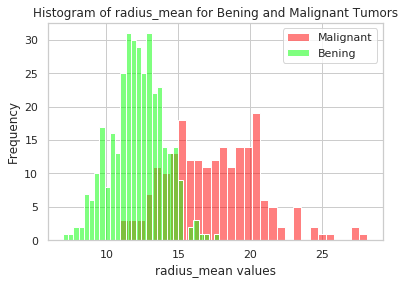

Most frequent malignant radius_mean is:  20.101999999999997


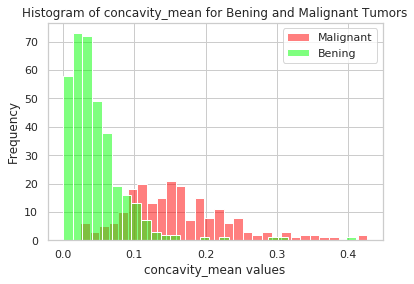

Most frequent malignant concavity_mean is:  0.144826


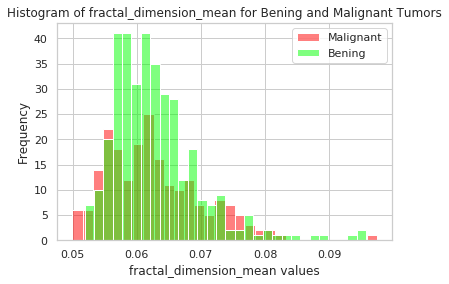

Most frequent malignant fractal_dimension_mean is:  0.06103866666666667


In [0]:
for elem in ['radius_mean', 'concavity_mean', 'fractal_dimension_mean']:
  attribute_hist(df, elem)

__Outliers__

In [0]:
data_bening = df[df["Diagnosis"] == "B"]
data_malignant = df[df["Diagnosis"] == "M"]
for elem in ['radius_mean', 'concavity_mean', 'fractal_dimension_mean']:
  desc = data_bening[elem].describe()
  Q1 = desc[4]
  Q3 = desc[6]
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  print("Outliers for " + elem)
  print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
  data_bening[data_bening[elem] < lower_bound][elem]
  print("Outliers: ",data_bening[(data_bening[elem] < lower_bound) | (data_bening[elem] > upper_bound)][elem].values)

Outliers for radius_mean
Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]
Outliers for concavity_mean
Anything outside this range is an outlier: ( -0.039209999999999995 , 0.11950999999999998 )
Outliers:  [0.313  0.3003 0.1321 0.4108 0.1307 0.1548 0.1374 0.1362 0.1975 0.228
 0.145  0.1544]
Outliers for fractal_dimension_mean
Anything outside this range is an outlier: ( 0.047685 , 0.076605 )
Outliers:  [0.08046 0.0898  0.07818 0.07769 0.07782 0.07839 0.08261 0.09296 0.08116
 0.07669 0.08743 0.0845  0.09502 0.09575 0.07976 0.07696 0.07751]


**Summary Statistics**

In [0]:
for elem in ['radius_mean', 'concavity_mean', 'fractal_dimension_mean']:
  print("----",elem,"----")
  print("variance", data_bening[elem].var())
  print(data_bening[elem].describe())
  print("")

---- radius_mean ----
variance 3.170221722043872
count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64

---- concavity_mean ----
variance 0.0018872204874219463
count    357.000000
mean       0.046058
std        0.043442
min        0.000000
25%        0.020310
50%        0.037090
75%        0.059990
max        0.410800
Name: concavity_mean, dtype: float64

---- fractal_dimension_mean ----
variance 4.552663504862618e-05
count    357.000000
mean       0.062867
std        0.006747
min        0.051850
25%        0.058530
50%        0.061540
75%        0.065760
max        0.095750
Name: fractal_dimension_mean, dtype: float64



**Effect size**<br>
It describes size of an effect. It is simple way of quantifying the difference between two groups.<br>
In an other saying, effect size emphasises the size of the difference<br>
Use cohen effect size
Cohen suggest that if d(effect size)= 0.2, it is small effect size, d = 0.5 medium effect size, d = 0.8 large effect size.<br>


In [0]:
for elem in ['radius_mean', 'concavity_mean', 'fractal_dimension_mean']:
  mean_diff = data_malignant[elem].mean() - data_bening[elem].mean()
  var_bening = data_bening[elem].var()
  var_malignant = data_malignant[elem].var()
  var_pooled = (len(data_bening)*var_bening +len(data_malignant)*var_malignant ) / float(len(data_bening)+ len(data_malignant))
  effect_size = mean_diff/np.sqrt(var_pooled)
  print(elem)
  print("Effect size: ",effect_size)
  print("")

radius_mean
Effect size:  2.2048585165041428

concavity_mean
Effect size:  2.002761730832176

fractal_dimension_mean
Effect size:  -0.026505879843043135



**Relationship Between Variables**

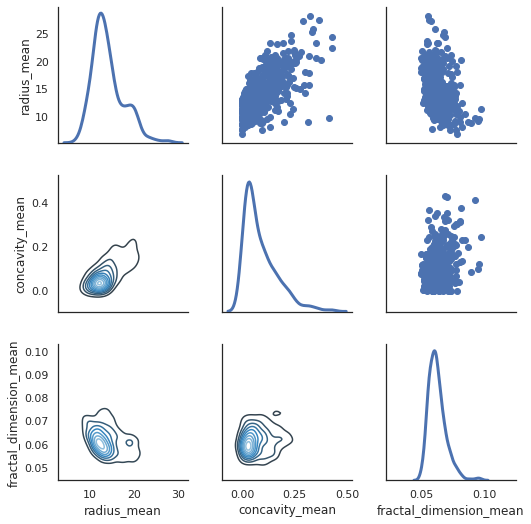

In [0]:
sns.set(style = "white")
df_cross = df.loc[:,["radius_mean","concavity_mean","fractal_dimension_mean"]]
g = sns.PairGrid(df_cross,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

**Correlation**

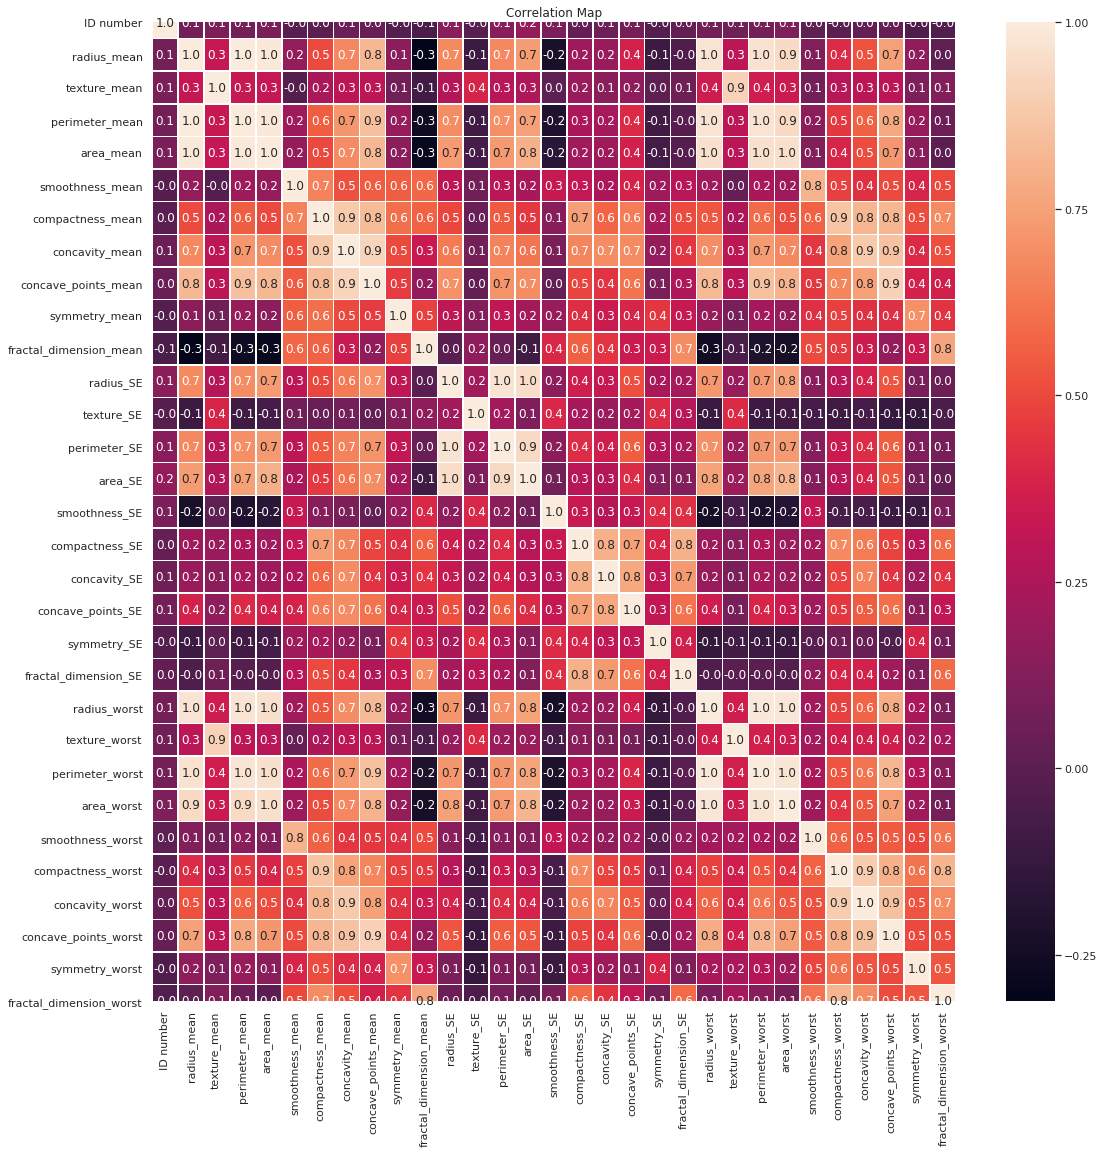

In [0]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
#plt.savefig('graph.png')
plt.show()

**Covariance**

In [0]:
print("Covariance between radius mean and concavity mean: ",df.radius_mean.cov(df.concavity_mean))
print("Covariance between radius mean and fractal dimension mean: ",df.radius_mean.cov(df.fractal_dimension_mean))
print("Covariance between concavity mean and fractal dimension mean: ",df.concavity_mean.cov(df.fractal_dimension_mean))

Covariance between radius mean and concavity mean:  0.19012758202583516
Covariance between radius mean and fractal dimension mean:  -0.007753706290904476
Covariance between concavity mean and fractal dimension mean:  0.00018955877365582998


Look at the variable decomposition with swarm plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

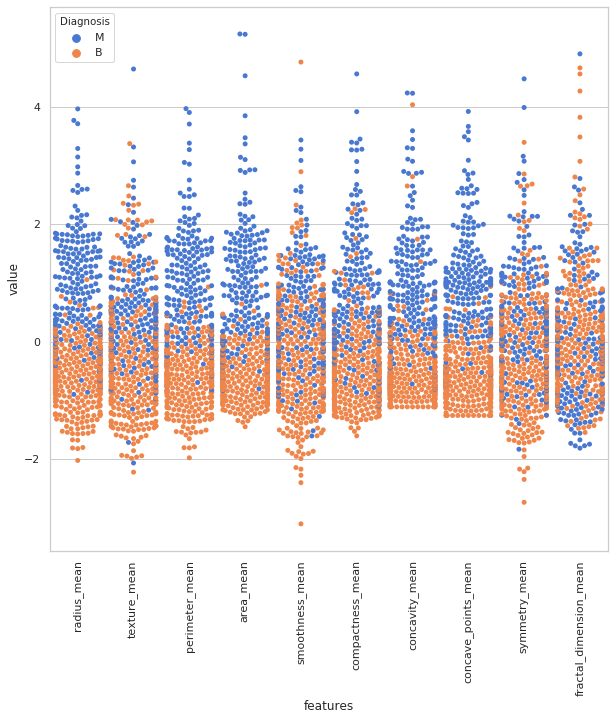

In [0]:
sns.set(style="whitegrid", palette="muted")
data_dia = df["Diagnosis"]
x=df.drop(['ID number','Diagnosis'],axis = 1)
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([data_dia,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

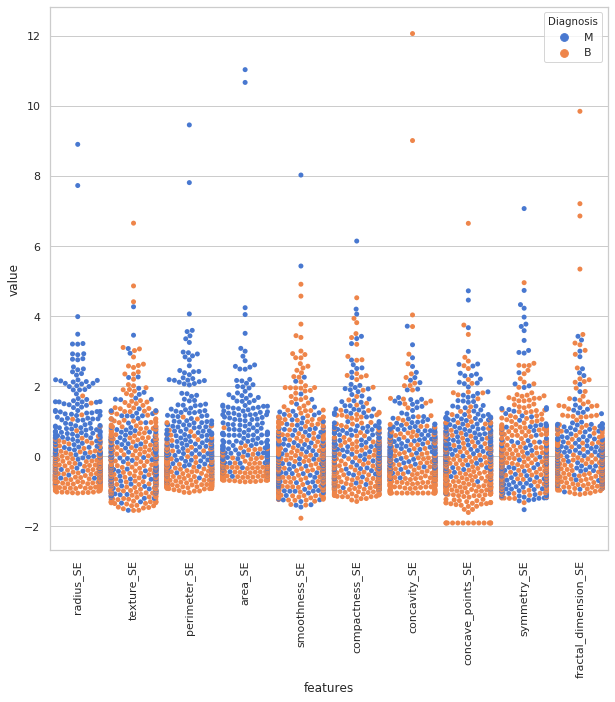

In [0]:
data = pd.concat([data_dia,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="Diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

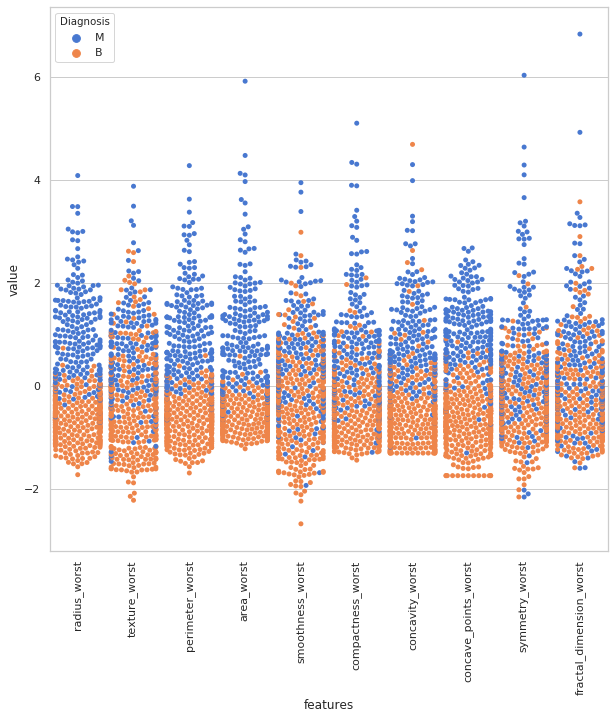

In [0]:
data = pd.concat([data_dia,data_n_2.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="Diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Diagnosis", data=data)
plt.xticks(rotation=90)

# Feature Selection

**Remove features by correlation**<br>
only keep one of all the 100% correlated sets:<br>
radius_mean, perimeter_mean, **area_mean**, radius_worst, perimeter_worst<br>
radius_worst, **area_worst**, perimeter_worst<br>
**area_SE**, radius_SE, perimeter_SE<br>
**area_mean**, area_worst

In [0]:
drop_list1 = ['perimeter_mean','radius_mean','radius_worst','perimeter_worst','radius_SE','perimeter_SE','area_worst']
x_1 = x.drop(drop_list1,axis = 1)
x_1.head()

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


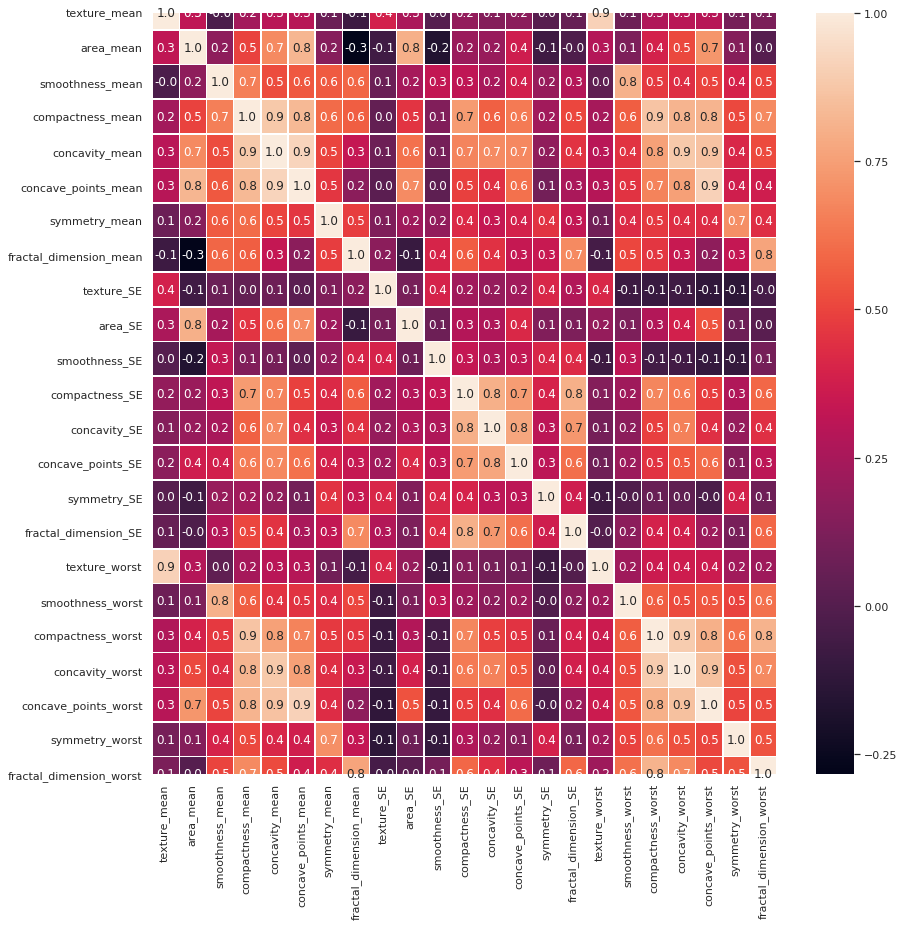

In [0]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

**Random Forest Cassification**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, data_dia, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ')
print(ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
print(pd.DataFrame(cm, columns=["B", "M"], index=["B", "M"]))
#sns.heatmap(cm,annot=True,fmt="d")

Accuracy is: 
0.9590643274853801
     B   M
B  106   2
M    5  58


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



**Support Vector Machine**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_1, data_dia, test_size=0.3, random_state=1)
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print(pd.DataFrame(cm, columns=["B", "M"], index=["B", "M"]))
#sns.heatmap(cm,annot=True,fmt="d")

Accuracy Score:
0.9649122807017544
     B   M
B  105   3
M    3  60


# Feature Extraction
Component Analysis with PCA<br>


**Normalization**

Text(0, 0.5, 'explained_variance_ratio')

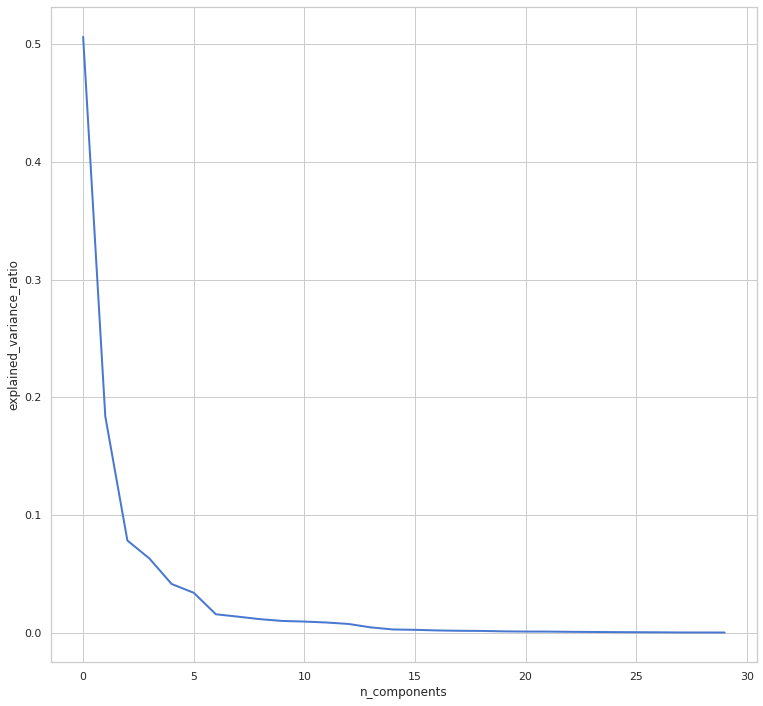

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, data_dia, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio')

**3D PCA Analysis**

In [0]:
from sklearn.preprocessing import LabelEncoder
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2', 'PC3'])
PCA_df = pd.concat([PCA_df, data_dia], axis = 1)
PCA_df['Diagnosis'] = LabelEncoder().fit_transform(PCA_df['Diagnosis'])
PCA_df.head()

,PC1,PC2,PC3,Diagnosis
0,1160.142574,-293.917544,48.578398,1
1,1269.122443,15.630182,-35.394534,1
2,995.793889,39.156743,-1.709753,1
3,-407.180803,-67.380320,8.672848,1
4,930.341180,189.340742,1.374801,1


In [0]:
import plotly.express as px
fig = px.scatter_3d(PCA_df, x='PC1', y='PC2', z='PC3', color='Diagnosis')
fig.show()

**Random Forest Classifier**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(PCA_df.drop(['Diagnosis'], axis=1), PCA_df.Diagnosis, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(random_state=43)      
clr_rf_2 = clf_rf_2.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf_2.predict(x_test))
print('Accuracy is: ')
print(ac)
cm = confusion_matrix(y_test,clf_rf_2.predict(x_test))
print(pd.DataFrame(cm, columns=["B", "M"], index=["B", "M"]))
#sns.heatmap(cm,annot=True,fmt="d")

Accuracy is: 
0.9649122807017544
     B   M
B  105   3
M    3  60


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



**Support Vector Machine**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(PCA_df.drop(['Diagnosis'], axis=1), PCA_df.Diagnosis, test_size=0.3, random_state=1)
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print(pd.DataFrame(cm, columns=["B", "M"], index=["B", "M"]))
#sns.heatmap(cm,annot=True,fmt="d")

Accuracy Score:
0.9298245614035088
     B   M
B  104   4
M    8  55


**4D PCA**

In [0]:
from sklearn.preprocessing import LabelEncoder
pca = PCA(n_components=4)
X_pca = pca.fit_transform(x)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
PCA_df = pd.concat([PCA_df, data_dia], axis = 1)
PCA_df['Diagnosis'] = LabelEncoder().fit_transform(PCA_df['Diagnosis'])
PCA_df.head()

,PC1,PC2,PC3,PC4,Diagnosis
0,1160.142574,-293.917544,48.578398,-8.711975,1
1,1269.122443,15.630182,-35.394534,17.861283,1
2,995.793889,39.156743,-1.709753,4.199340,1
3,-407.180803,-67.380320,8.672848,-11.759867,1
4,930.341180,189.340742,1.374801,8.499183,1


**Random Forest Classification**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(PCA_df.drop(['Diagnosis'], axis=1), PCA_df.Diagnosis, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(random_state=43)      
clr_rf_2 = clf_rf_2.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf_2.predict(x_test))
print('Accuracy is: ')
print(ac)
cm = confusion_matrix(y_test,clf_rf_2.predict(x_test))
print(pd.DataFrame(cm, columns=["B", "M"], index=["B", "M"]))
#sns.heatmap(cm,annot=True,fmt="d")

Accuracy is: 
0.9649122807017544
     B   M
B  105   3
M    3  60


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



**Support Vector Machine**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(PCA_df.drop(['Diagnosis'], axis=1), PCA_df.Diagnosis, test_size=0.3, random_state=1)
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print(pd.DataFrame(cm, columns=["B", "M"], index=["B", "M"]))
#sns.heatmap(cm,annot=True,fmt="d")

Accuracy Score:
0.9532163742690059
     B   M
B  105   3
M    5  58
